In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway, ttest_ind, mannwhitneyu, pearsonr

df_titanic = pd.read_csv("./data/titanic.csv")
df_tit = pd.read_csv("./data/titanic_modified.csv")
df_car = pd.read_csv("./data/car_crashes.csv", sep = "|")
df_viajes = pd.read_csv("./data/dataset_viajes_jul23.csv")

In [2]:
from tool_box import describe_df, tipifica_variables, get_features_num_regression
from tool_box import plot_features_num_regression,get_features_cat_regression, plot_features_cat_regression

In [3]:
describe_df(df_viajes)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
DATA_TYPE,object,object,object,int64,object,bool,float64,int64,float64,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,5,11,11,45,4,2,499,113,600,328,1
CARDIN (%),0.83,1.83,1.83,7.5,0.67,0.33,83.17,18.83,100.0,54.67,0.17


In [21]:
tipifica_variables(df_titanic)


,Categoria
survived,Binaria
pclass,Categórica
sex,Binaria
age,Numérica discreta
sibsp,Categórica
parch,Categórica
fare,Numérica continua
embarked,Categórica
class,Categórica
who,Categórica


(['survived', 'pclass'], <Figure size 1000x1000 with 2 Axes>)

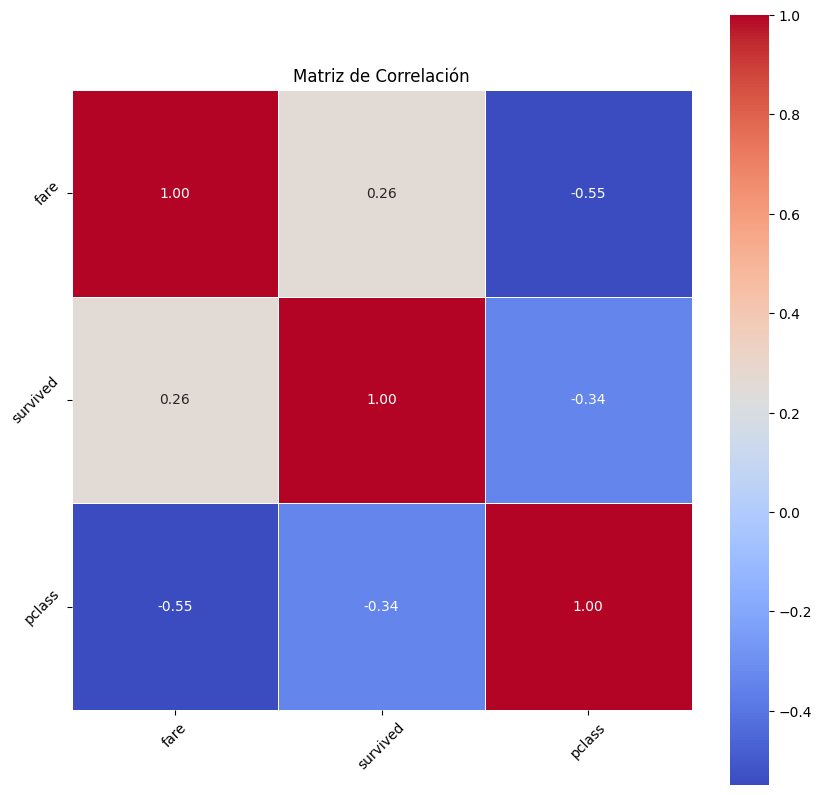

In [32]:
get_features_num_regression(df_titanic, 'fare', 0.2, 0.000000000001)

In [6]:

for col in df_viajes.columns:
    if df_viajes[col].dtype != 'object' and  df_viajes[col].dtype != 'bool':
        print(f"Columna {col} --->", pearsonr(df_viajes["ingresos"], df_viajes[col]))


Columna distancia ---> PearsonRResult(statistic=np.float64(0.9206055551334613), pvalue=np.float64(2.1600560381739455e-246))
Columna consumo_kg ---> PearsonRResult(statistic=np.float64(0.9416897025181559), pvalue=np.float64(4.602650271742753e-285))
Columna duracion ---> PearsonRResult(statistic=np.float64(0.8548580234276117), pvalue=np.float64(1.5214433434759807e-172))
Columna ingresos ---> PearsonRResult(statistic=np.float64(0.9999999999999999), pvalue=np.float64(0.0))


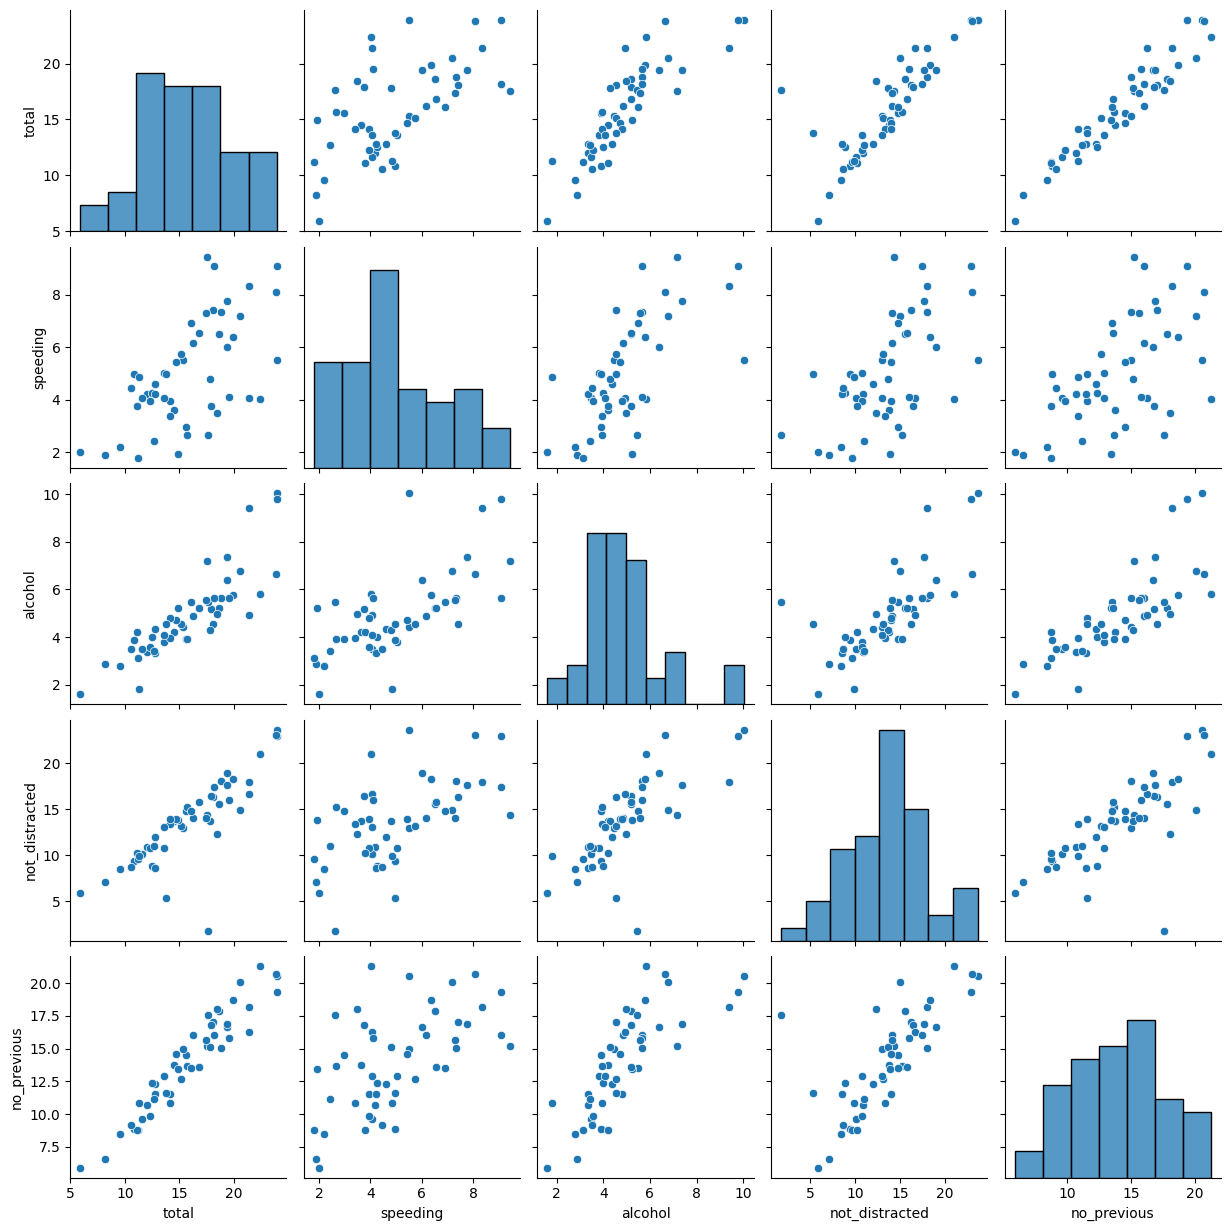

In [16]:
plot_features_num_regression(df_car, 'total', lista = [], umbral_corr=0.5, pvalue = 0.01)

In [ ]:
get_features_cat_regression(df_viajes, "ingresos", pvalue=0.05)

In [ ]:
get_features_cat_regression(df_viajes, "ingresos", pvalue=1.05)

In [ ]:
get_features_cat_regression(df_viajes, "ingresos", pvalue=0.06)

In [ ]:
plot_features_cat_regression(df_viajes,target_col= "ingresos", columns = [], pvalue = 0.05, with_individual_plot = False)


In [ ]:
plot_features_cat_regression(df_viajes,target_col= "ingresos", columns = ['avion'], pvalue = 0.05, with_individual_plot = False)